<a href="https://colab.research.google.com/github/ShubhamShaswat/face-detection/blob/master/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from tqdm import tqdm
import cv2




In [0]:
files.upload()


Saving me_shikha.jpg to me_shikha.jpg


{'me_shikha.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xb2\x00\xb2\x00\x00\xff\xe1\x11 Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x07\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x011\x00\x02\x00\x00\x00$\x00\x00\x08n\x012\x00\x02\x00\x00\x00\x14\x00\x00\x08\x92\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x08\xa6\x88%\x00\x04\x00\x00\x00\x01\x00\x00\x10\xd2\x9c\x9e\x00\x01\x00\x00\x00\x0e\x00\x00\x11\n\xea\x1c\x00\x07\x00\x00\x08\x0c\x00\x00\x00b\x00\x00\x00\x00\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [0]:
!ls

me_shikha.jpg  sample_data


In [0]:
#implement face detection using haar cascade

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
img = cv2.imread('Silicon_Valley.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [42]:
from google.colab.patches import cv2_imshow

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2_imshow(img)


NameError: ignored

In [0]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 427kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566174 sha256=bc882776eab372ba011b70eb642fe493c0e24056c96d21e68f4c55eebc0c5ecf
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
img=files.upload()

Saving NEWPICS.jpg to NEWPICS.jpg


In [0]:
#real time face detection


import face_recognition





In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


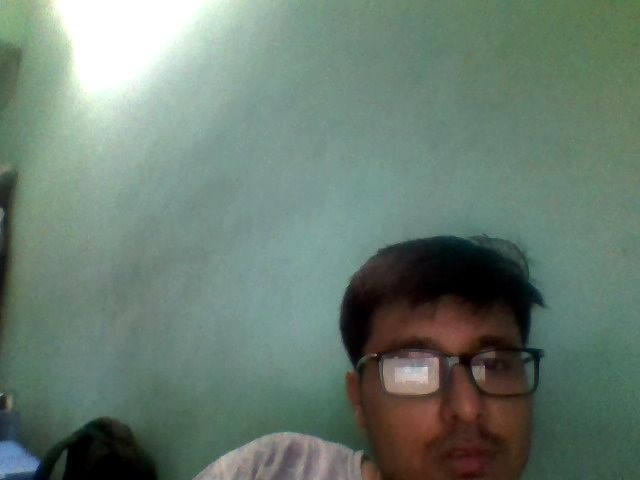

In [57]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

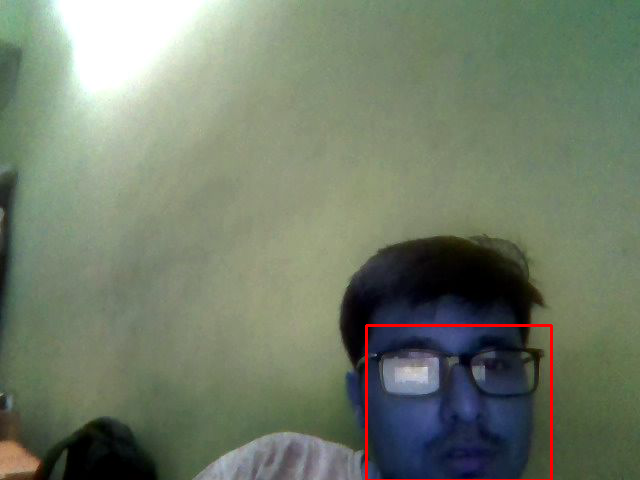

In [58]:
from google.colab.patches import cv2_imshow


image = face_recognition.load_image_file(filename)
face_locations = face_recognition.face_locations(image)

for (top, right, bottom, left) in face_locations:
  
  
  cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
    
    
cv2_imshow(image)